In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.8, rc={"lines:linewidth": 2.5})

warnings.filterwarnings('ignore')

In [3]:
payoff_types = {
    'payoff1' : '$(S_{t_2}-S_{t_1})^+$',
    # 'payoff2' : '$|S_{t_2}-1.1\cdot S_{t_1}|$',
    'payoff3' : '$\log(S_{t_2}/S_{t_1})$',
    'payoff4' : '$\sqrt{S_{t_1}\cdot S_{t_2}}$',
    # 'payoff6' : '1 if $S_{t_2} > S_{t_1}$',
    'payoff7' : r'$\frac{S_{t_1}+S_{t_2}}{2} - \sqrt{S_{t_1}\cdot S_{t_2}}$'
}
hedge_types = {'super' : 'Super-Hedge',
               'sub' : 'Sub-Hedge'}

In [5]:
def gapData(payoff_type, hedge_type, data_file):
    folder = '/Users/echochen/Documents/HPC_Job/'
    if hedge_type == 'super':
        path = folder + payoff_type + '/' + data_file
    else:
        path = folder + payoff_type + '_sub/' + data_file
    df = pd.read_csv(path, index_col=0)
    df.columns = df.columns.astype(int)
    plot_sample = list(df.count()[df.count() > 20].index)
    plot_sample.remove(0)
    df = df.loc[:, plot_sample]
    return df

In [7]:
def plot(df, payoff_type, hedge_type, ylim_min_coef, ylim_max_coef):
    plt.figure(figsize=(10, 6))
    
    x = df.columns
    median = df.median()
    count = df.count()
    plt.plot(x, median, color='darkgreen', label='Median')
    
    quantiles = [0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45]
    alphaList = [0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.50, 0.90]
    for i in range(len(quantiles)):
        p = quantiles[i]
        alpha = alphaList[i]
        plt.fill_between(x, df.quantile(p), df.quantile(1-p), color='seagreen', alpha=alpha, label=f'{p:.0%} - {1-p:.0%}')

    plt.xlabel(r'Distance between $t_0$ and $t_1$')
    plt.ylabel('Gap')
    ylim_min = median.median() - ylim_min_coef * (median.quantile(.75)-median.quantile(.25))
    ylim_max = median.median() + ylim_max_coef * (median.quantile(.75)-median.quantile(.25))
    plt.ylim(ylim_min, ylim_max)
    plt.legend(loc='upper left', bbox_to_anchor=(1.13, 1))
    
    ax2 = plt.gca().twinx()
    ax2.plot(x, count, color='orange', label='Sample Size', linestyle='--')
    ax2.set_ylabel('Sample Size')
    ax2.yaxis.grid(False)
    ax2.set_ylim(-10, 2300)
    ax2.legend(loc='upper left', bbox_to_anchor=(1.12, 0.1))

    plt.title(fr'{hedge_types[hedge_type]} with Payoff {payoff_types[payoff_type]}')
    plt.show()

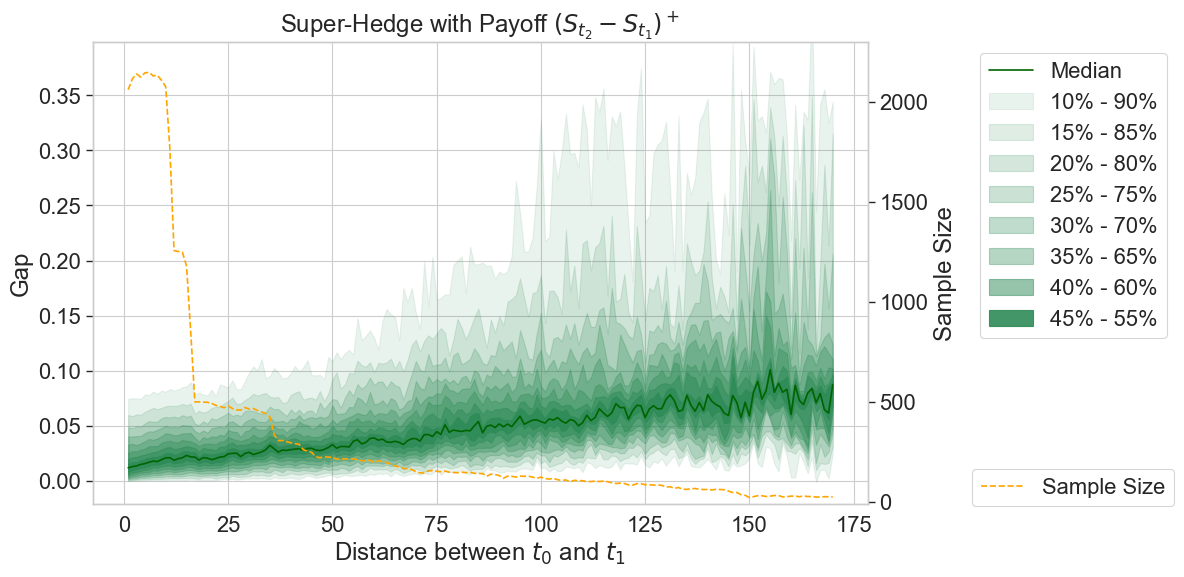

In [9]:
plot(gapData('payoff1', 'super', 'gapData_071124.csv'), 'payoff1', 'super', 2.0, 10.0)

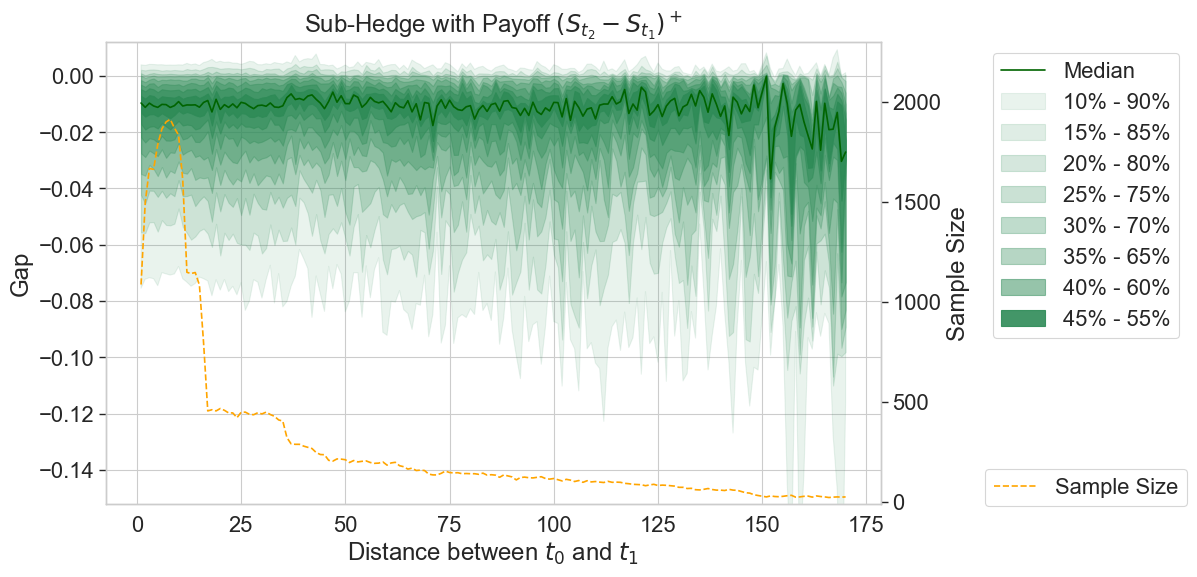

In [11]:
plot(gapData('payoff1', 'sub', 'gapData_091124.csv'), 'payoff1', 'sub', 50.0, 8.0) # temporary, N=100

In [13]:
def plot2(df1, df2, payoff_type, ax1_ylim_min_coef, ax1_ylim_max_coef, ax2_ylim_min_coef, ax2_ylim_max_coef, legend):
    fig, (ax1_main, ax2_main) = plt.subplots(1, 2, figsize=(15, 5))
    
    # left subplot
    x = df1.columns
    median = df1.median()
    count = df1.count()
    
    ## main axis
    ax1_main.plot(x, median, color='darkgreen', label='Median')
    quantiles = [0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45]
    alphaList = [0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.50, 0.90]
    for i in range(len(quantiles)):
        p = quantiles[i]
        alpha = alphaList[i]
        ax1_main.fill_between(x, df1.quantile(p), df1.quantile(1-p), color='seagreen', alpha=alpha, label=f'{p:.0%} - {1-p:.0%}')
    
    ax1_main.set_xlabel(r'Distance between $t_0$ and $t_1$')
    ax1_main.set_ylabel('Gap')
    ax1_ylim_min = median.median() - ax1_ylim_min_coef * (median.quantile(.75)-median.quantile(.25))
    ax1_ylim_max = median.median() + ax1_ylim_max_coef * (median.quantile(.75)-median.quantile(.25))
    ax1_main.set_ylim(ax1_ylim_min, ax1_ylim_max)
    if legend:
        ax1_main.legend(loc='upper left', bbox_to_anchor=(1.15, 1))
    ax1_main.set_title(fr'{hedge_types['super']} with Payoff {payoff_types[payoff_type]}')
    
    ## secondary axis
    ax1_secondary = ax1_main.twinx()
    ax1_secondary.plot(x, count, color='orange', label='Sample Size', linestyle='--')
    # ax1_secondary.set_ylabel('Sample Size')
    ax1_secondary.yaxis.grid(False)
    ax1_secondary.set_ylim(-10, 2300)
    if legend:
        ax1_secondary.legend(loc='upper left', bbox_to_anchor=(1.14, 0.1))
    
    # right subplot
    x = df2.columns
    median = df2.median()
    count = df2.count()

    ## main axis
    ax2_main.plot(x, median, color='darkgreen', label='Median')
    for i in range(len(quantiles)):
        p = quantiles[i]
        alpha = alphaList[i]
        ax2_main.fill_between(x, df2.quantile(p), df2.quantile(1-p), color='seagreen', alpha=alpha, label=f'{p:.0%} - {1-p:.0%}')
    
    ax2_main.set_xlabel(r'Distance between $t_0$ and $t_1$')
    # ax2_main.set_ylabel('Gap')
    ax2_ylim_min = median.median() - ax2_ylim_min_coef * (median.quantile(.75)-median.quantile(.25))
    ax2_ylim_max = median.median() + ax2_ylim_max_coef * (median.quantile(.75)-median.quantile(.25))
    ax2_main.set_ylim(ax2_ylim_min, ax2_ylim_max)
    ax2_main.set_title(fr'{hedge_types['sub']} with Payoff {payoff_types[payoff_type]}')
    
    ## secondary axis
    ax2_secondary = ax2_main.twinx()
    ax2_secondary.plot(x, count, color='orange', label='Sample Size', linestyle='--')
    ax2_secondary.set_ylabel('Sample Size')
    ax2_secondary.yaxis.grid(False)
    ax2_secondary.set_ylim(-10, 2300)
    
    plt.tight_layout()
    plt.show()

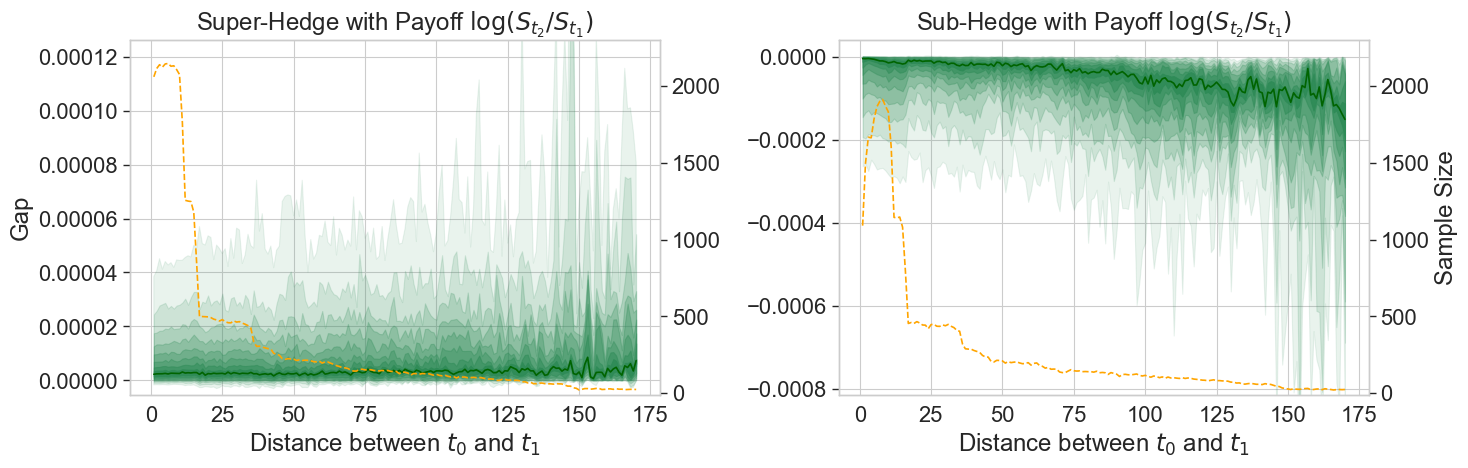

In [15]:
df1 = gapData('payoff3', 'super', 'gapData_031124.csv')
df2 = gapData('payoff3', 'sub', 'gapData_101124.csv')
ax1_ylim_min_coef, ax1_ylim_max_coef = 8.0, 120.0
ax2_ylim_min_coef, ax2_ylim_max_coef = 15.0, 1.5
plot2(df1, df2, 'payoff3', ax1_ylim_min_coef, ax1_ylim_max_coef, ax2_ylim_min_coef, ax2_ylim_max_coef, False)

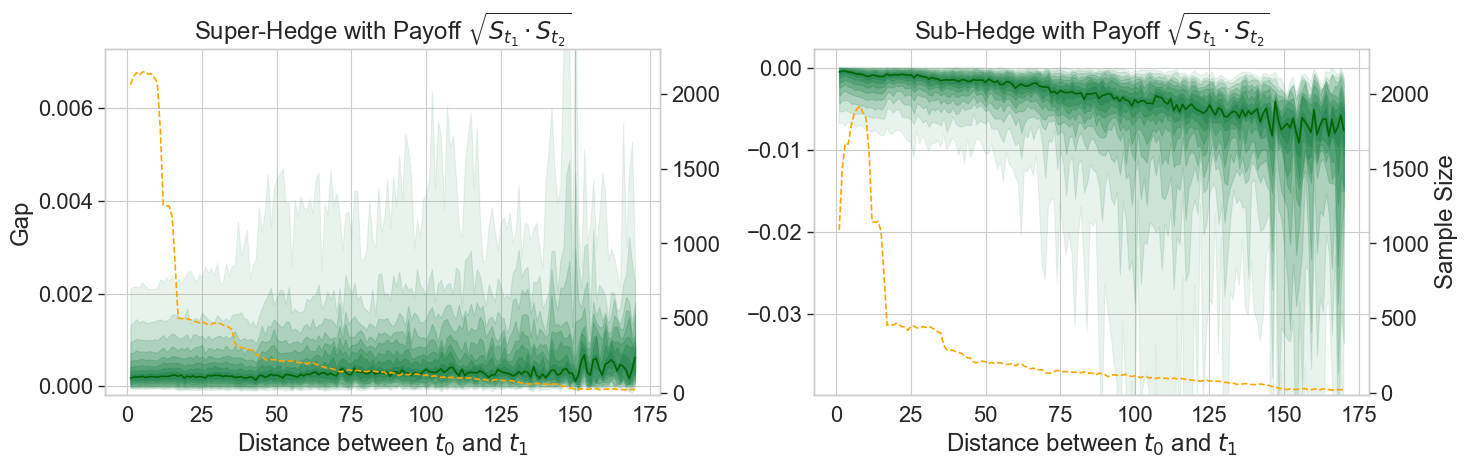

In [17]:
df1 = gapData('payoff4', 'super', 'gapData_211124.csv')
df2 = gapData('payoff4', 'sub', 'gapData_241124.csv')
ax1_ylim_min_coef, ax1_ylim_max_coef = 5.0, 80.0
ax2_ylim_min_coef, ax2_ylim_max_coef = 10.0, 1.5
plot2(df1, df2, 'payoff4', ax1_ylim_min_coef, ax1_ylim_max_coef, ax2_ylim_min_coef, ax2_ylim_max_coef, False)

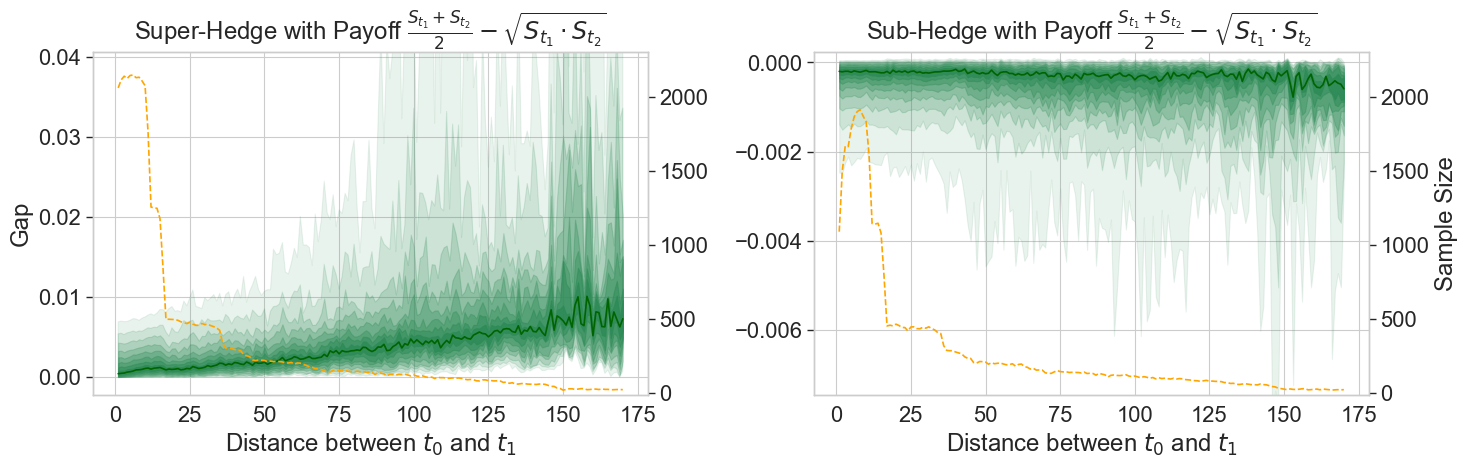

In [19]:
df1 = gapData('payoff7', 'super', 'gapData_091224.csv')
df2 = gapData('payoff7', 'sub', 'gapData_101224.csv')
ax1_ylim_min_coef, ax1_ylim_max_coef = 1.5, 10.0
ax2_ylim_min_coef, ax2_ylim_max_coef = 75.0, 5.0
plot2(df1, df2, 'payoff7', ax1_ylim_min_coef, ax1_ylim_max_coef, ax2_ylim_min_coef, ax2_ylim_max_coef, False)

In [21]:
def hist_subplots(df_super, df_sub, payoff_type):
    filtered_super = df_super[(df_super > df_super.quantile(0.05)) & (df_super < df_super.quantile(0.95))].stack()
    filtered_sub = df_sub[(df_sub > df_sub.quantile(0.05)) & (df_sub < df_sub.quantile(0.95))].stack()
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    filtered_super.hist(bins=100, ax=axes[0])
    axes[0].set_title(fr'Super-Hedge with Payoff {payoff_types[payoff_type]}')
    axes[0].set_xlabel('Payoff Gap')
    axes[0].set_ylabel('Frequency')
    
    filtered_sub.hist(bins=100, ax=axes[1])
    axes[1].set_title(fr'Sub-Hedge with Payoff {payoff_types[payoff_type]}')
    axes[1].set_xlabel('Payoff Gap')
    axes[1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

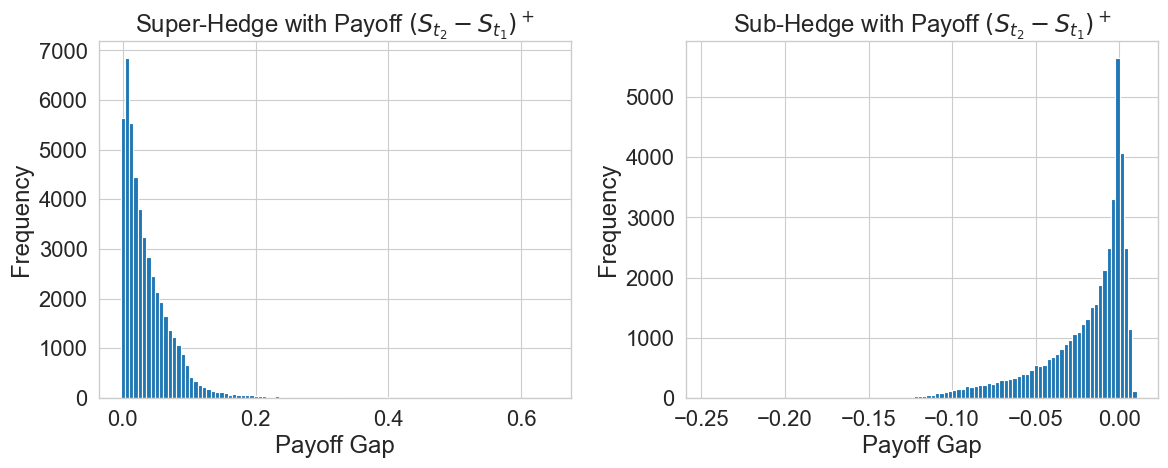

In [23]:
hist_subplots(gapData('payoff1', 'super', 'gapData_071124.csv'), gapData('payoff1', 'sub', 'gapData_091124.csv'), 'payoff1')

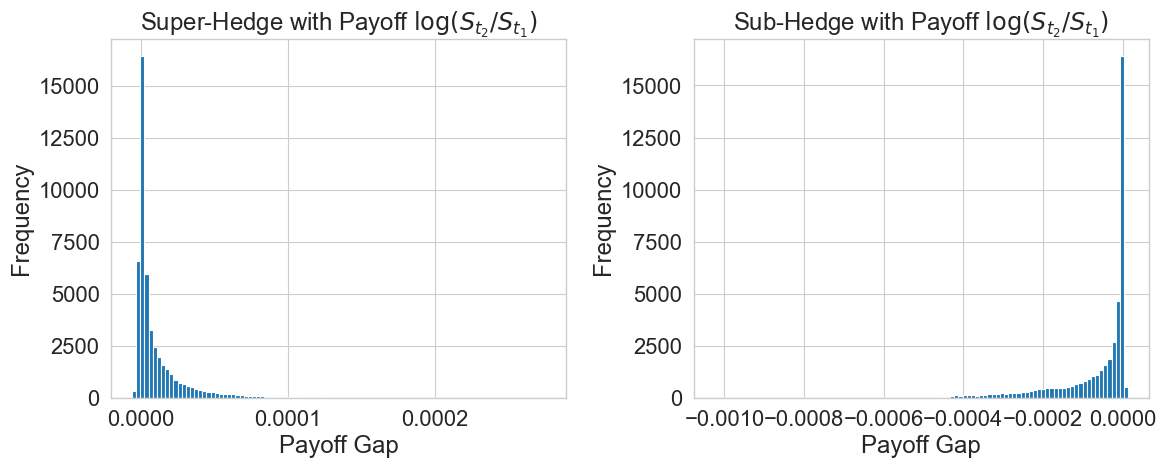

In [25]:
hist_subplots(gapData('payoff3', 'super', 'gapData_031124.csv'), gapData('payoff3', 'sub', 'gapData_101124.csv'), 'payoff3')

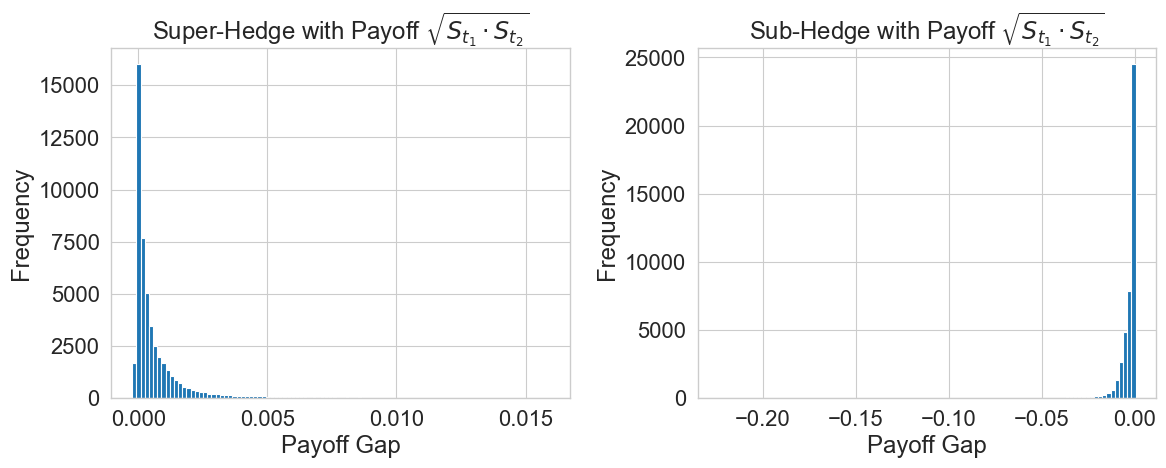

In [27]:
hist_subplots(gapData('payoff4', 'super', 'gapData_211124.csv'), gapData('payoff4', 'sub', 'gapData_241124.csv'), 'payoff4')

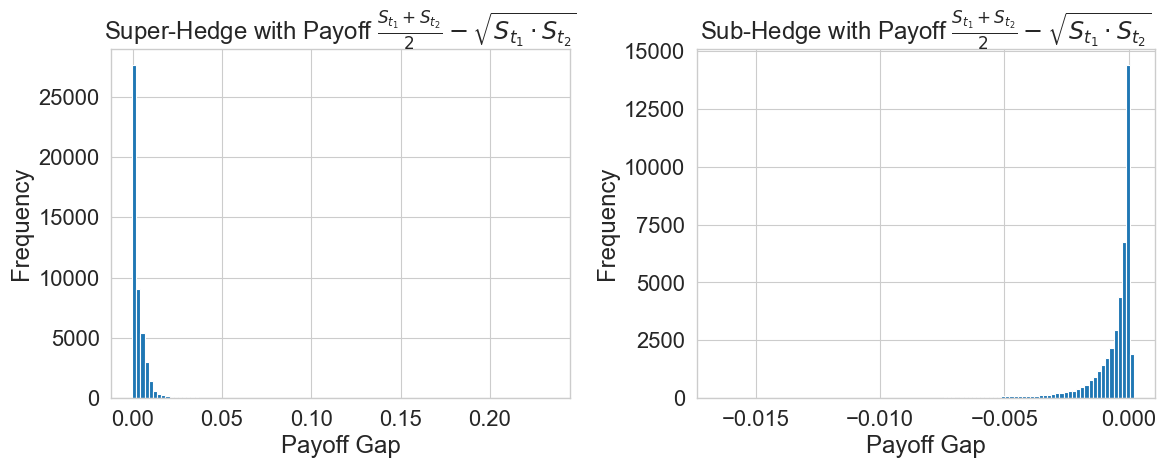

In [29]:
hist_subplots(gapData('payoff7', 'super', 'gapData_091224.csv'), gapData('payoff7', 'sub', 'gapData_101224.csv'), 'payoff7')